In [2]:
# Notebook setup
import xarray as xarr
!pip install netcdf4

import matplotlib.pyplot as plt

In [4]:
# Let's download a datafile to our serve (see the files tab)
!wget --no-check-certificate https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc

--2021-06-17 12:34:04--  https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 2610:20:8040:2::167, 2610:20:8040:2::168, 2610:20:8040:2::171, ...
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|2610:20:8040:2::167|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc [following]
--2021-06-17 12:34:05--  https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 2610:20:8040:2::171, 2610:20:8040:2::172, 2610:20:8040:2::177, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|2610:20:8040:2::171|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 1412680 (1.3M) [application/x-netcdf]

In [5]:
# Load the dataset using xarray
df = xarr.open_dataset('nodc_5906017_prof.nc')
df

<xarray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 0, n_levels: 511, n_param: 3, n_prof: 57)
Dimensions without coordinates: n_calib, n_history, n_levels, n_param, n_prof
Data variables:
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    platform_number               (n_prof) object ...
    project_name                  (n_prof) object ...
    pi_name                       (n_prof) object ...
    station_parameters            (n_prof, n_param) object ...
    cycle_number                  (n_prof) float64 ...
    direction                     (n_prof) object ...
    data_centre                   (n_prof) object ...
    dc_reference                  (n_prof) object ...
    data_state_indicator          (n_prof) object ...
    data_mode                     (n_prof) object ...
    platform_type                 (n_prof) object ...
    float_serial_no               (n_prof) object ...
    firmware_version              (n_prof) object ...
    wmo_inst_type                 (n_prof) object ...
    juld                          (n_prof) datetime64[ns] ...
    juld_qc                       (n_prof) object ...
    juld_location                 (n_prof) datetime64[ns] ...
    latitude                      (n_prof) float64 ...
    longitude                     (n_prof) float64 ...
    position_qc                   (n_prof) object ...
    positioning_system            (n_prof) object ...
    profile_pres_qc               (n_prof) object ...
    profile_temp_qc               (n_prof) object ...
    profile_psal_qc               (n_prof) object ...
    vertical_sampling_scheme      (n_prof) object ...
    config_mission_number         (n_prof) float64 ...
    pres                          (n_prof, n_levels) float32 ...
    pres_qc                       (n_prof, n_levels) object ...
    pres_adjusted                 (n_prof, n_levels) float32 ...
    pres_adjusted_qc              (n_prof, n_levels) object ...
    pres_adjusted_error           (n_prof, n_levels) float32 ...
    temp                          (n_prof, n_levels) float32 ...
    temp_qc                       (n_prof, n_levels) object ...
    temp_adjusted                 (n_prof, n_levels) float32 ...
    temp_adjusted_qc              (n_prof, n_levels) object ...
    temp_adjusted_error           (n_prof, n_levels) float32 ...
    psal                          (n_prof, n_levels) float32 ...
    psal_qc                       (n_prof, n_levels) object ...
    psal_adjusted                 (n_prof, n_levels) float32 ...
    psal_adjusted_qc              (n_prof, n_levels) object ...
    psal_adjusted_error           (n_prof, n_levels) float32 ...
    parameter                     (n_prof, n_calib, n_param) object ...
    scientific_calib_equation     (n_prof, n_calib, n_param) object ...
    scientific_calib_coefficient  (n_prof, n_calib, n_param) object ...
    scientific_calib_comment      (n_prof, n_calib, n_param) object ...
    scientific_calib_date         (n_prof, n_calib, n_param) object ...
    history_institution           (n_history, n_prof) object ...
    history_step                  (n_history, n_prof) object ...
    history_software              (n_history, n_prof) object ...
    history_software_release      (n_history, n_prof) object ...
    history_reference             (n_history, n_prof) object ...
    history_date                  (n_history, n_prof) object ...
    history_action                (n_history, n_prof) object ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_hi

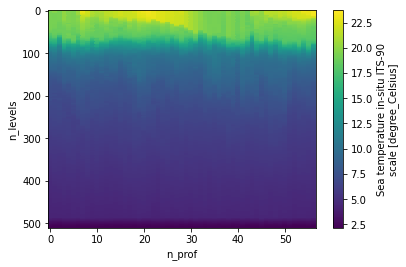

In [7]:
# Quick Timeseries Profile plot of Temperature
df.temp_adjusted.T.plot()
plt.gca().invert_yaxis()

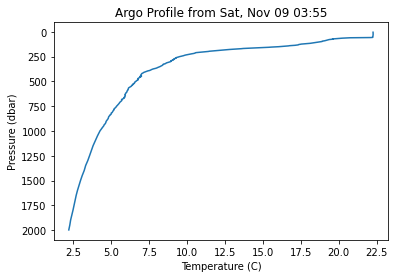

In [9]:
# Profile Plot
nprof = 25 #Specify a profile to plot
plt.plot(df.temp_adjusted[nprof], df.pres_adjusted[nprof])

plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.title('Argo Profile from %s' % df.juld[nprof].dt.strftime('%a, %b %d %H:%M').values)

plt.gca().invert_yaxis() #Flip the y-axis

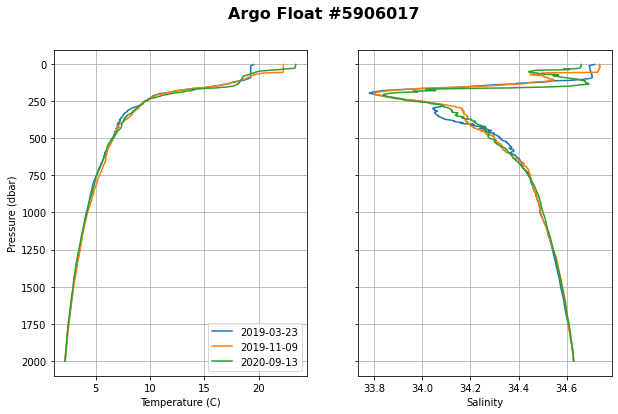

In [10]:
# Profile Plot
# Subplot example
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

nprof = 0 # Fist profile
ax1.plot(df.temp_adjusted[nprof], df.pres_adjusted[nprof], label=df.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(df.psal_adjusted[nprof], df.pres_adjusted[nprof])

nprof = 25 # Middle-ish profile
ax1.plot(df.temp_adjusted[nprof], df.pres_adjusted[nprof], label=df.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(df.psal_adjusted[nprof], df.pres_adjusted[nprof])

nprof = -1 # Last profile
ax1.plot(df.temp_adjusted[nprof], df.pres_adjusted[nprof], label=df.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(df.psal_adjusted[nprof], df.pres_adjusted[nprof])

ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.invert_yaxis()
ax1.legend()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Argo Float #%d' % df.platform_number[nprof].values, fontweight='bold', fontsize=16);

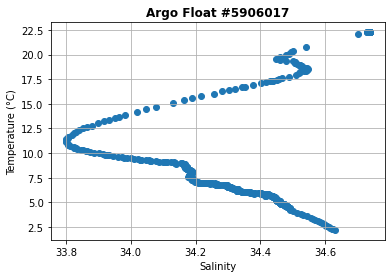

In [11]:
# TS Diagram
nprof = 25 #Selected profile
plt.scatter(df.psal_adjusted[nprof], df.temp_adjusted[nprof])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Argo Float #%d' % df.platform_number[nprof].values, fontweight='bold');

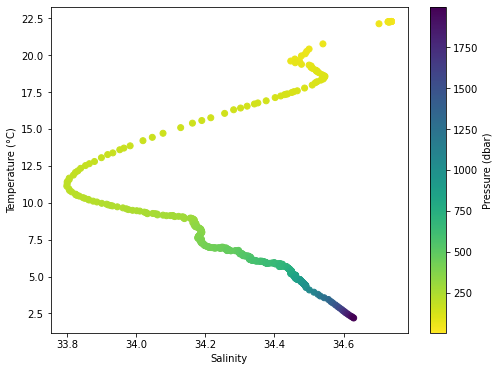

In [12]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))

nprof = 25 #Selected profile
plt.scatter(df.psal_adjusted[nprof], df.temp_adjusted[nprof], c=df.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')

cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')

In [13]:
!pip install seawater
import seawater
import numpy as np

  Stored in directory: C:\Users\Ehsan\AppData\Local\pip\Cache\wheels\b1\bb\2c\f12b7223a9799f6cc146047f28edb0f82ffaab42614c4cb6dc
Successfully built seawater


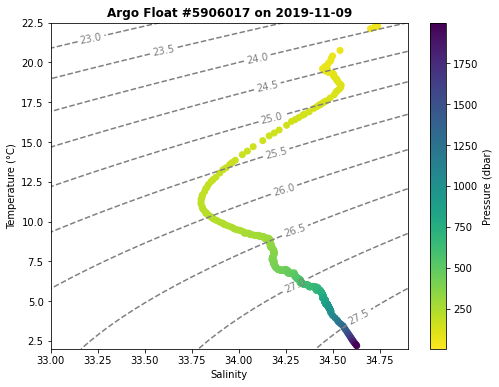

In [14]:
# TS Diagram with density contours
plt.figure(figsize=(8,6))

# Calculate the density lines
x = np.arange(33, 35, .1)
y = np.arange(2, 23, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
nprof = 25 #Selected profile
plt.scatter(df.psal_adjusted[nprof], df.temp_adjusted[nprof], c=df.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
plt.title('Argo Float #%d on %s' % (df.platform_number[nprof].values, df.juld[nprof].dt.strftime('%Y-%m-%d').values), fontweight='bold');

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');

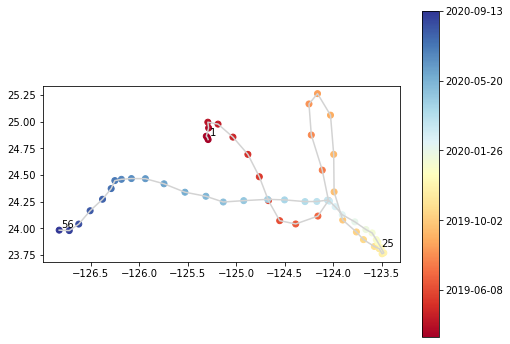

In [15]:
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(df.longitude, df.latitude, c='lightgrey')
plt.scatter(df.longitude, df.latitude, c=df.juld, cmap='RdYlBu')

# Crude profile labels
for jj in [1,25,-1]:
  plt.text(df.longitude[jj]+.02, df.latitude[jj]+.02, df.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

In [16]:
# Install Cartopy in Google Colab
!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Uninstalling Shapely-1.6.4.post2:
  Successfully uninstalled Shapely-1.6.4.post2
Skipping bdist_wheel for shapely, due to binaries being disabled for it.
  Running setup.py install for shapely: started
    Running setup.py install for shapely: finished with status 'done'


In [18]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature

C:\Users\Ehsan\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\Ehsan\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


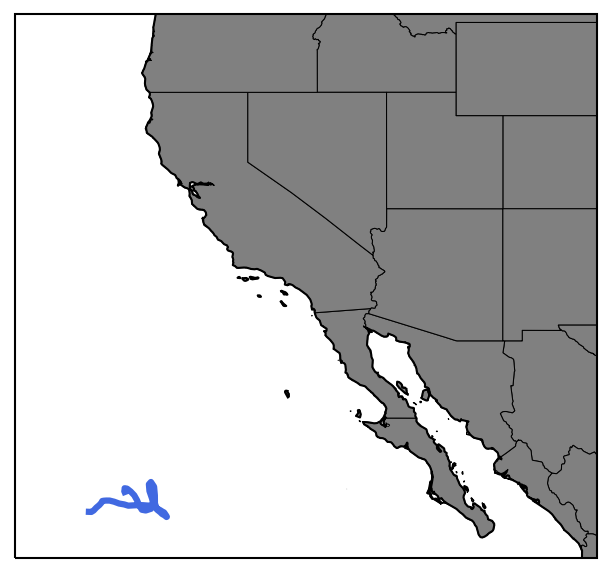

In [19]:
fig = plt.figure(figsize=(6.4,4.8),dpi=150)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -105, 22, 45])

# Basemaps
states = NaturalEarthFeature(category="cultural", scale="10m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black",facecolor='grey')
ax.coastlines('50m', linewidth=1)

ax.plot(df.longitude, df.latitude, linewidth=3, color='royalblue');